In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

euk = pd.read_csv("eukaryotes.tsv ", sep = "\t", na_values = ["-"])
euk.head(5)

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676,64.5000,38549.0,38554.0,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669,36.0529,38311.0,48265.0,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046,35.1153,59847.0,71219.0,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924,34.0470,37603.0,41939.0,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349,35.6991,31200.0,37660.0,2010,Chromosome


In [5]:
euk.dtypes

Species                object
Kingdom                object
Class                  object
Size (Mb)             float64
GC%                   float64
Number of genes       float64
Number of proteins    float64
Publication year        int64
Assembly status        object
dtype: object

Text(0.5, 1.0, 'Number of genes vs number of proteins for animal genomes')

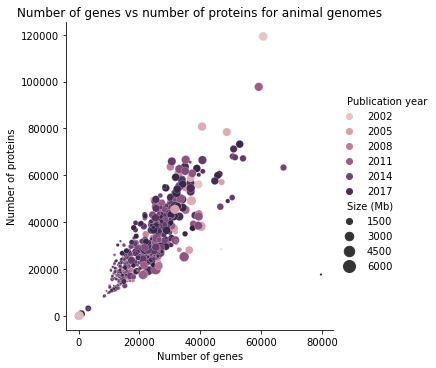

In [10]:
# Number of genes vs number of proteins for animal genomes

animals = euk[euk["Kingdom"] == "Animals"].dropna()

sns.relplot(data=animals, x="Number of genes", y="Number of proteins", size="Size (Mb)", sizes=(2, 150), hue="Publication year")
plt.title("Number of genes vs number of proteins for animal genomes")

Text(0.5, 1.0, 'Number of genes vs number of proteins in different classes')

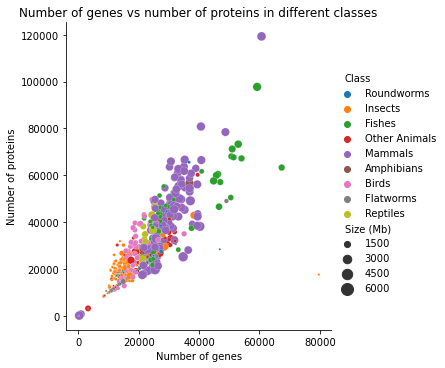

In [12]:
# hue can also be mapped to a categorical variable

sns.relplot(data=animals, x="Number of genes", y="Number of proteins", size="Size (Mb)", sizes=(2, 150), hue="Class")
plt.title("Number of genes vs number of proteins in different classes")

Text(0.5, 1.0, 'Number of genes for animal genomes in different classes')

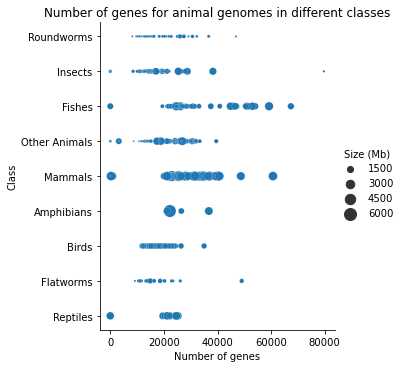

In [13]:
sns.relplot(data=animals, x="Number of genes", y="Class", size="Size (Mb)", sizes=(2, 150))
plt.title("Number of genes for animal genomes in different classes")

Text(1.05, 1.05, 'Number of genes vs number of proteins for bird and fish genomes')

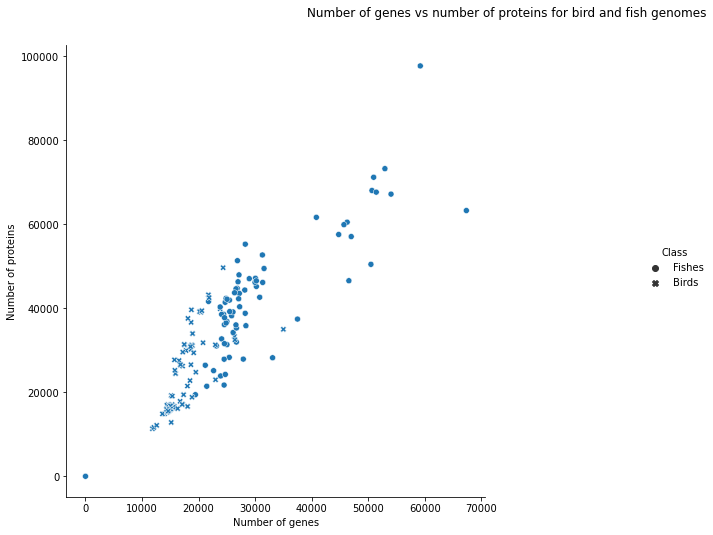

In [26]:
# Representing categories

genomes = euk[euk["Class"].isin(["Birds", "Fishes"])]

sns.relplot(data=genomes, x="Number of genes", y="Number of proteins", style="Class", height=7)
plt.title("Number of genes vs number of proteins for bird and fish genomes", x=1.05, y=1.05)

Text(0.5, 1.05, 'Number of genes vs number of proteins')

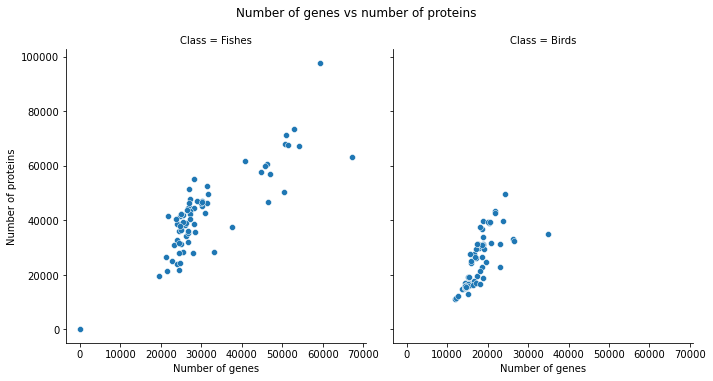

In [38]:
g = sns.relplot(data=genomes, x="Number of genes", y="Number of proteins", col="Class")
g.fig.suptitle("Number of genes vs number of proteins", y=1.05)

Text(0.5, 1.05, 'Number of genes vs number of proteins')

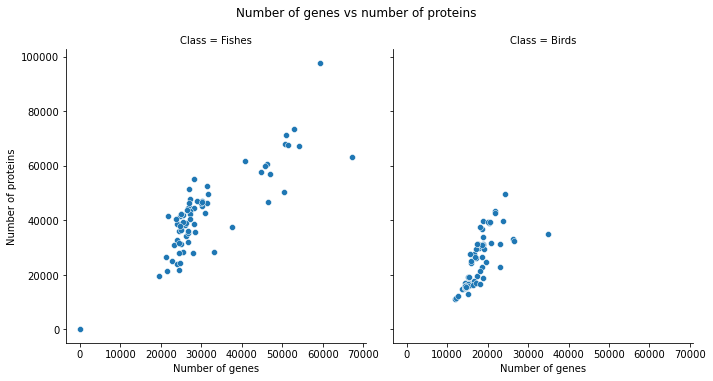

In [39]:
sns.relplot(data=genomes, x="Number of genes", y="Number of proteins", col="Class")
plt.suptitle("Number of genes vs number of proteins", y=1.05)

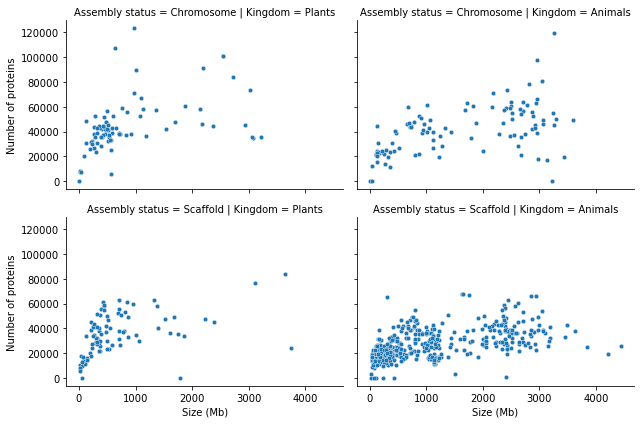

In [56]:
# Compare animal and plant genomes assembled into chromosomes or scaffolds

data = euk[
    (euk["Kingdom"].isin(["Animals", "Plants"])) &
    (euk["Assembly status"].isin(["Scaffold", "Chromosome"])) &
    (euk["Size (Mb)"] < 5000)
]

g = sns.relplot(data=data, x="Size (Mb)", y="Number of proteins", col="Kingdom", 
                row="Assembly status", aspect=1.5, height=3, s=20)

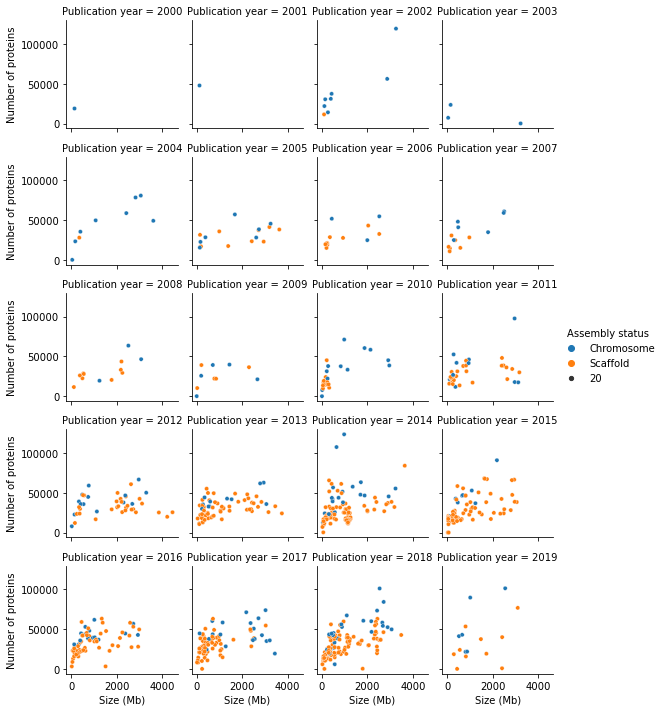

In [59]:
# Wrapped columns

g = sns.relplot(
    data=data, x="Size (Mb)", y="Number of proteins",
    col="Publication year", col_wrap=4,
    hue="Assembly status", height=2, size=20
)

Text(0.5, 1.05, 'Linear regression of GC% vs number of proteins')

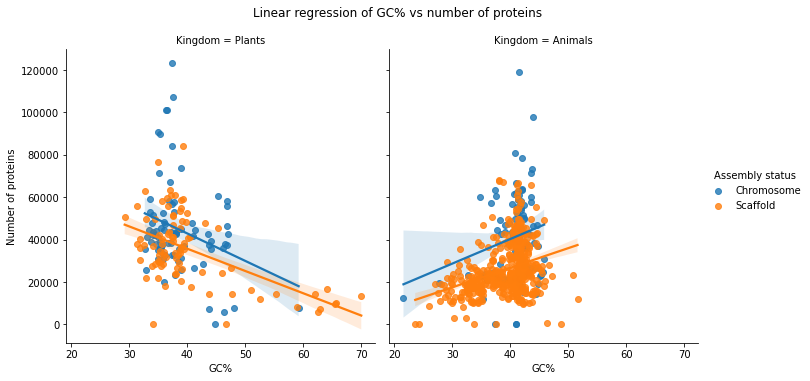

In [60]:
# Regression plots

g = sns.lmplot(
    data=data, x="GC%", y="Number of proteins",
    col="Kingdom", hue="Assembly status"
)

g.fig.suptitle("Linear regression of GC% vs number of proteins", y=1.05)

Text(0.5, 1.05, 'Number of genes for animal genomes in different classes')

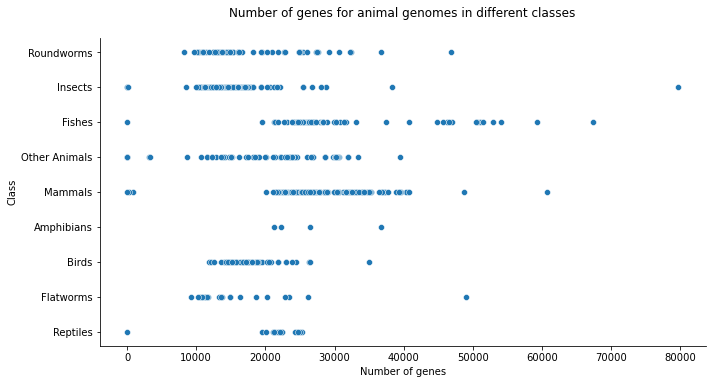

In [72]:
animals = euk[euk["Kingdom"] == "Animals"].dropna()
animals_and_plants = euk[(euk["Kingdom"].isin(["Animals", "Plants"])) & (euk["Size (Mb)"] < 5000)].dropna()

sns.relplot(data=animals, y="Class", x="Number of genes", aspect=2, height=5)
plt.title("Number of genes for animal genomes in different classes", y=1.05)

Text(0.5, 1.05, 'Number of genes for animal genomes in different classes')

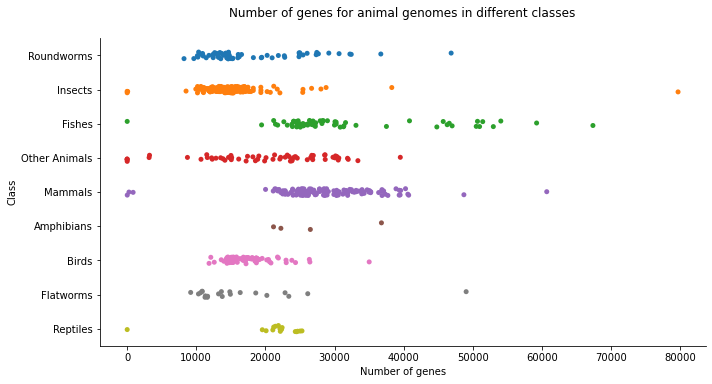

In [73]:
sns.catplot(data=animals, y="Class", x="Number of genes", aspect=2, height=5)
plt.title("Number of genes for animal genomes in different classes", y=1.05)

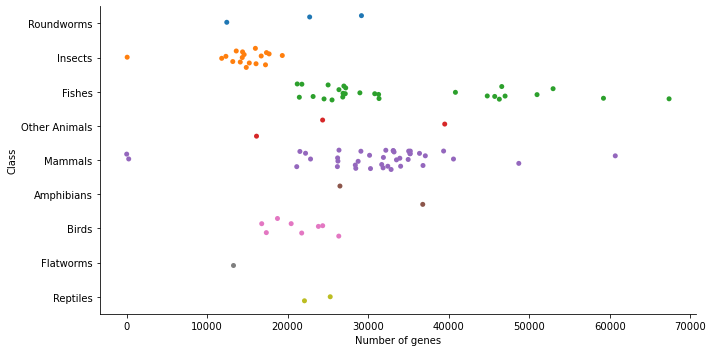

In [80]:
sns.catplot(data=animals[animals["Assembly status"] == "Chromosome"],
            y="Class", x="Number of genes",
            aspect=2, jitter=0.3
)

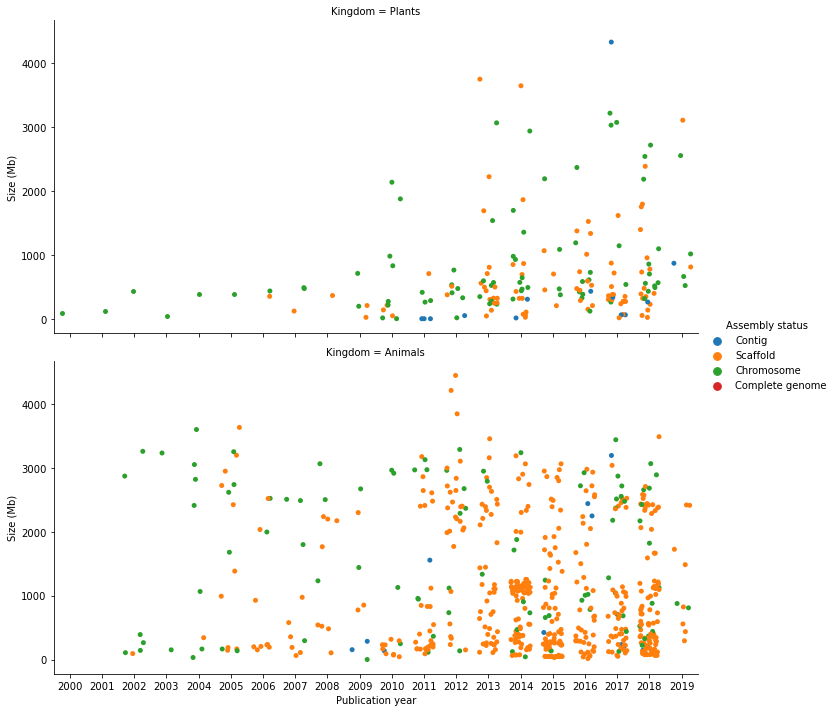

In [90]:
sns.catplot(data=animals_and_plants,
            #x="Size (Mb)", y="Publication year",
            x="Publication year", y="Size (Mb)",
            hue="Assembly status", row="Kingdom",
            hue_order=["Contig", "Scaffold", "Chromosome", "Complete genome"],
            aspect=2, jitter=0.3
)

Text(0.5, 1.05, 'Genome size for plants and animals colored by class')

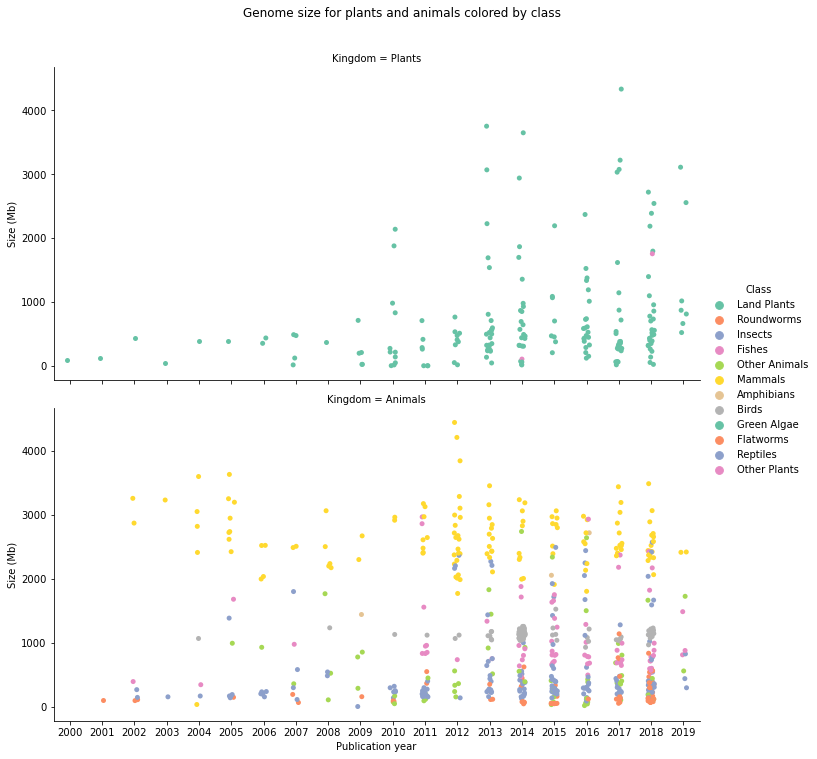

In [95]:
g = sns.catplot(data=animals_and_plants,
            x="Publication year", y="Size (Mb)",
            hue="Class", row="Kingdom",
            aspect=2, palette="Set2"
)

g.fig.suptitle("Genome size for plants and animals colored by class", y=1.05)